In [ ]:
import json
with open('/home/sajadi/backup/tmp/wsd/detailedreslog.txt') as f:
    for line in f:
        jsline = line.split('\t')[1]
        js = json.loads(jsline)
        if ("wiki-mentions.5000.json" in js["dsname"]) and (js["ws"]==10):
            if js["method"]=='wlm':
                wlm = js["tp"]
            if js["method"]=='rvspagerank':
                rvs = js["tp"]
            if js["method"]=='ams':
                ams = js["tp"]              

In [ ]:
def get_prec(tp_list):
    overall_tp = 0
    overall_count=0
    macro_prec = 0;
    for tp, count in tp_list:
        overall_tp += tp
        overall_count += count
        macro_prec += float(tp)/count
        
    macro_prec = macro_prec/len(tp_list)
    micro_prec = float(overall_tp)/overall_count
    
    return micro_prec, macro_prec

In [ ]:
b=0
e=len(wlm)
e=5000

In [ ]:
print round(get_prec(wlm[b:e]))

In [ ]:
print get_prec(ams[b:e])

In [ ]:
print get_prec(rvs[b:e])

In [ ]:
round(.5)

# Some statistics for the paper

In [ ]:
l=0
i=0
with open('/home/sajadi/backup/tmpbackup/log.out.iterations.txt') as f:
    for line in f:
        r= re.match(".*# of iterations: ([\d]+),.*",line)
        if r is None:
            continue
        i += int(r.group(1))
        l +=1
print i,l, float(i)/l  


In [ ]:
(6.5+7.4)/2

# Processing wsd results

In [1]:
import sys
table_no=3
sys.path.insert(0,'..')
from wikisim.utils import *

In [2]:
import pandas as pd

#don't remember why had header
#df = pd.read_csv('/home/sajadi/backup/tmp/results/wsd/reslog.csv', sep='\t', header=0)

df = pd.read_csv('/home/sajadi/backup/tmp/results/wsd/reslog.csv', sep='\t', header = None)
df.columns=['start','method', 'op_method','dir','max_t', 'ws', 'dsname', 'micro','macro', 'time']
df.head()

,start,method,op_method,dir,max_t,ws,dsname,micro,macro,time
0,[2016-09-08 17:59:34.225660],ams,ilp,both,5,5,/users/grad/sajadi/backup/datasets/ner/kore.json,0.753521,0.739333,0:00:35
1,[2016-09-08 21:16:51.918781],ams,ilp,both,5,5,/users/grad/sajadi/backup/datasets/ner/wiki-me...,0.717765,0.638173,3:17:17
2,[2016-09-09 03:11:06.405334],ams,ilp,both,5,5,/users/grad/sajadi/backup/datasets/ner/aida.json,0.700485,0.681829,5:54:14
3,[2016-09-09 03:11:26.627716],wlm,ilp,in,5,5,/users/grad/sajadi/backup/datasets/ner/kore.json,0.795775,0.781667,0:00:20
4,[2016-09-09 06:02:57.402705],wlm,ilp,in,5,5,/users/grad/sajadi/backup/datasets/ner/wiki-me...,0.697339,0.615440,2:51:30


In [3]:
df1= df.drop('start', axis=1)
df1= df1.drop('ws', axis=1)
# df.drop(8, axis=1, inplace=True)

In [4]:
df1.head()

,method,op_method,dir,max_t,dsname,micro,macro,time
0,ams,ilp,both,5,/users/grad/sajadi/backup/datasets/ner/kore.json,0.753521,0.739333,0:00:35
1,ams,ilp,both,5,/users/grad/sajadi/backup/datasets/ner/wiki-me...,0.717765,0.638173,3:17:17
2,ams,ilp,both,5,/users/grad/sajadi/backup/datasets/ner/aida.json,0.700485,0.681829,5:54:14
3,wlm,ilp,in,5,/users/grad/sajadi/backup/datasets/ner/kore.json,0.795775,0.781667,0:00:20
4,wlm,ilp,in,5,/users/grad/sajadi/backup/datasets/ner/wiki-me...,0.697339,0.615440,2:51:30


In [5]:
df2 = df1.copy()
df2.loc[:,'dsname'] = df2.loc[:,'dsname'].replace('/users/grad/sajadi/backup/datasets/ner/kore.json','KORE')
df2.loc[:,'dsname'] = df2.loc[:,'dsname'].replace('/users/grad/sajadi/backup/datasets/ner/aida.json','AIDA-CoNLL')
df2.loc[:,'dsname'] = df2.loc[:,'dsname'].replace('/users/grad/sajadi/backup/datasets/ner/wiki-mentions.5000.json','Wiki')
df2.loc[:,'dsname'] = df2.loc[:,'dsname'].replace('/users/grad/sajadi/backup/datasets/ner/msnbc.json','msnbc')
df2.loc[:,'dsname'] = df2.loc[:,'dsname'].replace('/users/grad/sajadi/backup/datasets/ner/aquaint.json','aquaint')

df2.loc[:,'method'] = df2.loc[:,'method'].replace('ams','overlap')
df2.loc[:,'method'] = df2.loc[:,'method'].replace('rvspagerank','rvsPageRank')
df2.loc[:,'method'] = df2.loc[:,'method'].replace('word2vec.300','word2vec')

df2.loc[:,'op_method'] = df2.loc[:,'op_method'].replace('ilp2','key-ilp')
df2.loc[:,'op_method'] = df2.loc[:,'op_method'].replace('context4_4','context')

df2.head()

,method,op_method,dir,max_t,dsname,micro,macro,time
0,overlap,ilp,both,5,KORE,0.753521,0.739333,0:00:35
1,overlap,ilp,both,5,Wiki,0.717765,0.638173,3:17:17
2,overlap,ilp,both,5,AIDA-CoNLL,0.700485,0.681829,5:54:14
3,wlm,ilp,in,5,KORE,0.795775,0.781667,0:00:20
4,wlm,ilp,in,5,Wiki,0.697339,0.615440,2:51:30


In [6]:
def methodselect(r):
    
    if table_no==0: #just for test
        #return ((r.loc['method'] == 'rvsPageRank') and (r.loc['dir']=='both') and (r.loc['op_method'] in ['context', 'tagme']))
        return (r.loc['op_method'] in ['tagme'])
    
    if table_no==1:
        return ((r.loc['method'] in ['wlm']) and (r.loc['dir']=='in') or \
                (r.loc['method'] in ['word2vec']) or \
                (r.loc['method'] in ['overlap', 'rvsPageRank']) and (r.loc['dir']=='both')) and \
                (r.loc['op_method'] == 'ilp')
    if table_no==2:
        return (r.loc['method'] == 'rvsPageRank' and( r.loc['dir']=='both') and \
                (r.loc['op_method'] in ['ilp','keyq','context'])) or \
                (r.loc['method'] == 'word2vec' and r.loc['op_method'] in ['context'])
        #(r.loc['method'] == 'wlm' and r.loc['dir']=='in' and r.loc['op_method'] in  ['tagme'])
    if table_no==3 or table_no==4:
        return ((r.loc['method'] == 'rvsPageRank') and (r.loc['dir']=='both') and \
                (r.loc['op_method'] in ['ilp','context', 'keyq'])) #or \
                #(r.loc['method'] in ['word2vec'] and r.loc['op_method'] in  ['context'])
    
df3 = df2[df2.apply(lambda r: ('wiki-mentions.json' not in r.loc['dsname']) and (r.loc['max_t'] in [5,10,15]), axis=1)]
df3 = df3[df3.apply(methodselect, axis=1)]
df3

,method,op_method,dir,max_t,dsname,micro,macro,time
6,rvsPageRank,ilp,both,5,KORE,0.859155,0.857667,0:00:54
7,rvsPageRank,ilp,both,5,Wiki,0.738231,0.665184,4:03:27
8,rvsPageRank,ilp,both,5,AIDA-CoNLL,0.732195,0.733071,7:02:16
15,rvsPageRank,context,both,5,KORE,0.894366,0.896333,0:00:05
16,rvsPageRank,context,both,5,Wiki,0.792532,0.785905,0:26:36
17,rvsPageRank,context,both,5,AIDA-CoNLL,0.813374,0.790836,0:39:17
24,rvsPageRank,ilp,both,10,KORE,0.767606,0.754667,0:01:56
25,rvsPageRank,ilp,both,10,Wiki,0.645253,0.593918,8:22:22
26,rvsPageRank,ilp,both,10,AIDA-CoNLL,0.672766,0.661365,14:58:47
33,rvsPageRank,context,both,10,KORE,0.767606,0.755667,0:00:14


In [7]:
df4=df3.drop('dir', axis=1)
if table_no==1:
    df4=df4.drop('op_method', axis=1)
if table_no==2:
    df4[df4['method']=='word2vec']=df4[df4['method']=='word2vec'].replace('context', 'key-vsm-word2vec')
    df4['op_method']=df4['op_method'].replace('keyq', 'key')
    df4['op_method']=df4['op_method'].replace('context', 'key-vsm')
if table_no==3:
    df4=df4.drop(['method', 'micro', 'macro'], axis=1)
if table_no==4:
    #df4=df4.drop(['method', 'micro', 'macro'], axis=1)
    df4['op_method']=df4['op_method'].replace('keyq', 'key')
    df4['op_method']=df4['op_method'].replace('context', 'key-vsm')
    
    
df4

,op_method,max_t,dsname,time
6,ilp,5,KORE,0:00:54
7,ilp,5,Wiki,4:03:27
8,ilp,5,AIDA-CoNLL,7:02:16
15,context,5,KORE,0:00:05
16,context,5,Wiki,0:26:36
17,context,5,AIDA-CoNLL,0:39:17
24,ilp,10,KORE,0:01:56
25,ilp,10,Wiki,8:22:22
26,ilp,10,AIDA-CoNLL,14:58:47
33,context,10,KORE,0:00:14


In [8]:
cols = df4.columns.tolist()
cols

['op_method', 'max_t', 'dsname', 'time']

In [9]:
cols = df4.columns.tolist()
cols[0],cols[1] = cols[1],cols[0]
df5 = df4[cols]
df5.head()

,max_t,op_method,dsname,time
6,5,ilp,KORE,0:00:54
7,5,ilp,Wiki,4:03:27
8,5,ilp,AIDA-CoNLL,7:02:16
15,5,context,KORE,0:00:05
16,5,context,Wiki,0:26:36


In [10]:
if table_no==3 or table_no==4:
    df5.loc[:,'time'] = df5.loc[:,'time'].apply(lambda x: str2delta(x).total_seconds())
df5    

,max_t,op_method,dsname,time
6,5,ilp,KORE,54.0
7,5,ilp,Wiki,14607.0
8,5,ilp,AIDA-CoNLL,25336.0
15,5,context,KORE,5.0
16,5,context,Wiki,1596.0
17,5,context,AIDA-CoNLL,2357.0
24,10,ilp,KORE,116.0
25,10,ilp,Wiki,30142.0
26,10,ilp,AIDA-CoNLL,53927.0
33,10,context,KORE,14.0


In [11]:
if table_no==1:
    grouped = df5.groupby(['max_t','method'])
if table_no in [0,2,3]:
    grouped = df5.groupby(['max_t','op_method'])
#grouped.get_group((5,'ams'))

In [12]:
for g in grouped.groups:
    print grouped.get_group(g)
    print '----------------------'
    

    max_t op_method      dsname    time
51     15   context        KORE    12.0
52     15   context        Wiki  3811.0
53     15   context  AIDA-CoNLL  4715.0
88     15   context       msnbc   131.0
89     15   context     aquaint   108.0
----------------------
    max_t op_method      dsname    time
33     10   context        KORE    14.0
34     10   context        Wiki  3549.0
35     10   context  AIDA-CoNLL  5507.0
76     10   context       msnbc    63.0
77     10   context     aquaint    49.0
----------------------
    max_t op_method      dsname     time
90      5      keyq        KORE     35.0
91      5      keyq        Wiki  13103.0
92      5      keyq  AIDA-CoNLL  23539.0
93      5      keyq       msnbc    396.0
94      5      keyq     aquaint    298.0
----------------------
    max_t op_method      dsname     time
95     10      keyq        KORE    110.0
96     10      keyq        Wiki  29785.0
97     10      keyq  AIDA-CoNLL  50832.0
98     10      keyq       msnbc    777.0


In [13]:
gdf = grouped.get_group(g)

tkore = gdf[gdf['dsname'] == "KORE"]
taida = gdf[gdf['dsname'] == "AIDA-CoNLL"]
twiki = gdf[gdf['dsname'] == "Wiki"]
tmsnbc = gdf[gdf['dsname'] == "msnbc"]
taquaint = gdf[gdf['dsname'] == "aquaint"]
print gdf
print tmsnbc
# tdf = pd.DataFrame([[gdf['max_t'].iloc[0], gdf['method'].iloc[0]] 
#                     + list(tmsnbc.iloc[0,4:5]) + list(taquaint.iloc[0,4:5])+ list(tkore.iloc[0,4:5])+ list(taida.iloc[0,4:5]) + list(twiki.iloc[0,4:5]) ])


    max_t op_method      dsname     time
24     10       ilp        KORE    116.0
25     10       ilp        Wiki  30142.0
26     10       ilp  AIDA-CoNLL  53927.0
70     10       ilp       msnbc    814.0
71     10       ilp     aquaint    699.0
    max_t op_method dsname   time
70     10       ilp  msnbc  814.0


In [14]:
rdf = pd.DataFrame()
for g in grouped.groups:
    gdf = grouped.get_group(g)
    tkore = gdf[gdf['dsname'] == "KORE"]
    taida = gdf[gdf['dsname'] == "AIDA-CoNLL"]
    twiki = gdf[gdf['dsname'] == "Wiki"]
    tmsnbc = gdf[gdf['dsname'] == "msnbc"]
    taquaint = gdf[gdf['dsname'] == "aquaint"]
    if table_no==1:
        tdf = pd.DataFrame([[gdf['max_t'].iloc[0], gdf['method'].iloc[0]] 
                        + list(tmsnbc.iloc[0,4:5]) + list(taquaint.iloc[0,4:5])+ list(tkore.iloc[0,4:5])+ list(taida.iloc[0,4:5]) + list(twiki.iloc[0,4:5]) ])
    if table_no in [0, 2]:
        tdf = pd.DataFrame([[gdf['max_t'].iloc[0], gdf['op_method'].iloc[0]] 
                        + list(tmsnbc.iloc[0,4:5]) + list(taquaint.iloc[0,4:5]) + list(tkore.iloc[0,4:5])+ list(taida.iloc[0,4:5]) + list(twiki.iloc[0,4:5]) ])
    if table_no==3:
        tdf = pd.DataFrame([[gdf['max_t'].iloc[0], gdf['op_method'].iloc[0]] 
                        + list(tmsnbc.iloc[0,3:]) + list(taquaint.iloc[0,3:]) + list(tkore.iloc[0,3:])+ list(taida.iloc[0,3:]) + list(twiki.iloc[0,3:])  ])
    rdf = rdf.append(tdf)

In [15]:
rdf

,0,1,2,3,4,5,6
0,15,context,131.0,108.0,12.0,4715.0,3811.0
0,10,context,63.0,49.0,14.0,5507.0,3549.0
0,5,keyq,396.0,298.0,35.0,23539.0,13103.0
0,10,keyq,777.0,647.0,110.0,50832.0,29785.0
0,15,ilp,2607.0,2192.0,809.0,276735.0,148370.0
0,15,keyq,1159.0,1069.0,189.0,81775.0,44248.0
0,5,context,45.0,31.0,5.0,2357.0,1596.0
0,5,ilp,403.0,325.0,54.0,25336.0,14607.0
0,10,ilp,814.0,699.0,116.0,53927.0,30142.0


In [16]:
#miindex = pd.MultiIndex.f(index, names=['cs', 'SR Method'])
midf = rdf.copy()
if table_no==1:
    midf[1]=pd.Categorical(midf[1],['overlap','wlm','word2vec','rvsPageRank'])
if table_no==2:
    midf[1]=pd.Categorical(midf[1],['ilp','key','key-vsm-word2vec', 'key-vsm'])
    
midf = midf.sort_values(by=[0,1])
midf

,0,1,2,3,4,5,6
0,5,context,45.0,31.0,5.0,2357.0,1596.0
0,5,ilp,403.0,325.0,54.0,25336.0,14607.0
0,5,keyq,396.0,298.0,35.0,23539.0,13103.0
0,10,context,63.0,49.0,14.0,5507.0,3549.0
0,10,ilp,814.0,699.0,116.0,53927.0,30142.0
0,10,keyq,777.0,647.0,110.0,50832.0,29785.0
0,15,context,131.0,108.0,12.0,4715.0,3811.0
0,15,ilp,2607.0,2192.0,809.0,276735.0,148370.0
0,15,keyq,1159.0,1069.0,189.0,81775.0,44248.0


In [17]:
midf.index = pd.MultiIndex.from_arrays([midf[0], midf[1]],names=['cs', 'Method'])
midf

0        1       2       3      4         5         6
cs Method                                                         
5  context   5  context    45.0    31.0    5.0    2357.0    1596.0
   ilp       5      ilp   403.0   325.0   54.0   25336.0   14607.0
   keyq      5     keyq   396.0   298.0   35.0   23539.0   13103.0
10 context  10  context    63.0    49.0   14.0    5507.0    3549.0
   ilp      10      ilp   814.0   699.0  116.0   53927.0   30142.0
   keyq     10     keyq   777.0   647.0  110.0   50832.0   29785.0
15 context  15  context   131.0   108.0   12.0    4715.0    3811.0
   ilp      15      ilp  2607.0  2192.0  809.0  276735.0  148370.0
   keyq     15     keyq  1159.0  1069.0  189.0   81775.0   44248.0

In [18]:
midf.drop(0, axis=1, inplace=True)
midf.drop(1, axis=1, inplace=True)
midf

2       3      4         5         6
cs Method                                            
5  context    45.0    31.0    5.0    2357.0    1596.0
   ilp       403.0   325.0   54.0   25336.0   14607.0
   keyq      396.0   298.0   35.0   23539.0   13103.0
10 context    63.0    49.0   14.0    5507.0    3549.0
   ilp       814.0   699.0  116.0   53927.0   30142.0
   keyq      777.0   647.0  110.0   50832.0   29785.0
15 context   131.0   108.0   12.0    4715.0    3811.0
   ilp      2607.0  2192.0  809.0  276735.0  148370.0
   keyq     1159.0  1069.0  189.0   81775.0   44248.0

In [47]:
micolumns = ["MSNBC", "AQUAINT", "KORE","AIDA-CoNLL","Wiki"]
    
midf.columns = micolumns
midf = midf.round(2)
midf

MSNBC  AQUAINT   KORE  AIDA-CoNLL      Wiki
cs Method                                               
5  context    45.0     31.0    5.0      2357.0    1596.0
   ilp       403.0    325.0   54.0     25336.0   14607.0
   keyq      396.0    298.0   35.0     23539.0   13103.0
10 context    63.0     49.0   14.0      5507.0    3549.0
   ilp       814.0    699.0  116.0     53927.0   30142.0
   keyq      777.0    647.0  110.0     50832.0   29785.0
15 context   131.0    108.0   12.0      4715.0    3811.0
   ilp      2607.0   2192.0  809.0    276735.0  148370.0
   keyq     1159.0   1069.0  189.0     81775.0   44248.0

In [55]:
#temp, delete
np.divide( midf.loc[(15,'ilp')],midf.loc[(15,'context')])
4715.0*60

282900.0

In [20]:
print midf.to_latex()

\begin{tabular}{llrrrrr}
\toprule
   &         &   MSNBC &  AQUAINT &   KORE &  AIDA-CoNLL &      Wiki \\
cs & Method &         &          &        &             &           \\
\midrule
5  & context &    45.0 &     31.0 &    5.0 &      2357.0 &    1596.0 \\
   & ilp &   403.0 &    325.0 &   54.0 &     25336.0 &   14607.0 \\
   & keyq &   396.0 &    298.0 &   35.0 &     23539.0 &   13103.0 \\
10 & context &    63.0 &     49.0 &   14.0 &      5507.0 &    3549.0 \\
   & ilp &   814.0 &    699.0 &  116.0 &     53927.0 &   30142.0 \\
   & keyq &   777.0 &    647.0 &  110.0 &     50832.0 &   29785.0 \\
15 & context &   131.0 &    108.0 &   12.0 &      4715.0 &    3811.0 \\
   & ilp &  2607.0 &   2192.0 &  809.0 &    276735.0 &  148370.0 \\
   & keyq &  1159.0 &   1069.0 &  189.0 &     81775.0 &   44248.0 \\
\bottomrule
\end{tabular}



In [32]:
midf_plot = midf.copy()
midf_plot=midf_plot.drop('AQUAINT', axis=1)
midf_plot=midf_plot.drop('KORE', axis=1)
#midf_plot=midf_plot.drop('MSNBC', axis=1)

#midf = midf.drop['']

In [44]:
x=pd.Series()
y=pd.Series()
z=pd.Series()
l=[]
for i in midf_plot.index.levels[0]:
        x=x.append(midf_plot.loc[(i,'ilp')])
        y=y.append(midf_plot.loc[(i,'keyq')])
        z=z.append(midf_plot.loc[(i,'context')])
        l += [c+'\n'+str(i) for c in midf_plot.columns]
x=x.values
y=y.values
z=z.values
        

In [45]:
import numpy as np
x=np.log10(x)
y=np.log10(y)
z=np.log10(z)

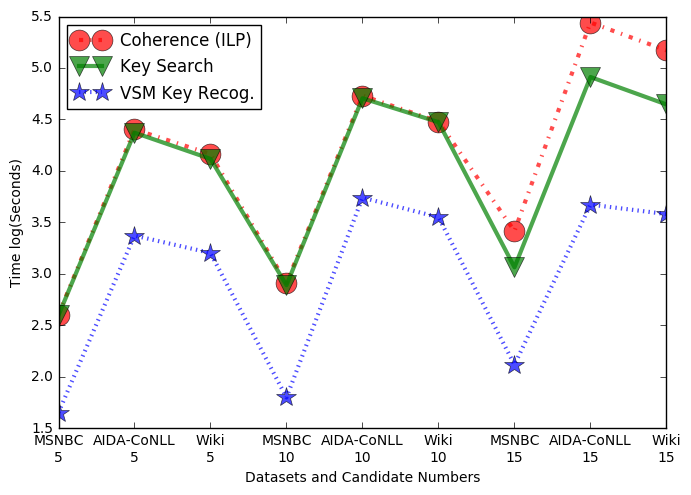

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')

index = np.arange(len(x))
bar_width = 0.45

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.plot(index, x, '-.o',  ms=15, lw=3,alpha=0.7, color='red', label='Coherence (ILP)')
plt.plot(index, y, '-v', ms=15, lw=3,alpha=0.7, color='green', label='Key Search')
plt.plot(index, z, ':*', ms=15, lw=3,alpha=0.7, color='blue', label='VSM Key Recog.')

plt.xlabel('Datasets and Candidate Numbers')
plt.ylabel('Time log(Seconds)')


# l1=["MSNBC", "AQUAINT", "KORE","AIDA-CoNLL","Wiki"]*3
# l2=['5']*5+['10']*5+['15']*5

l1=["MSNBC","AIDA-CoNLL","Wiki"]*3
l2=['5']*3+['10']*3+['15']*3


labels = [r+"\n"+s for r,s in zip(l1,l2)]
plt.xticks(np.arange(len(x)),labels)
plt.legend()

plt.tight_layout()
plt.legend(loc=2)
plt.savefig('timebarlog.eps')
plt.show()


/home/sajadi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


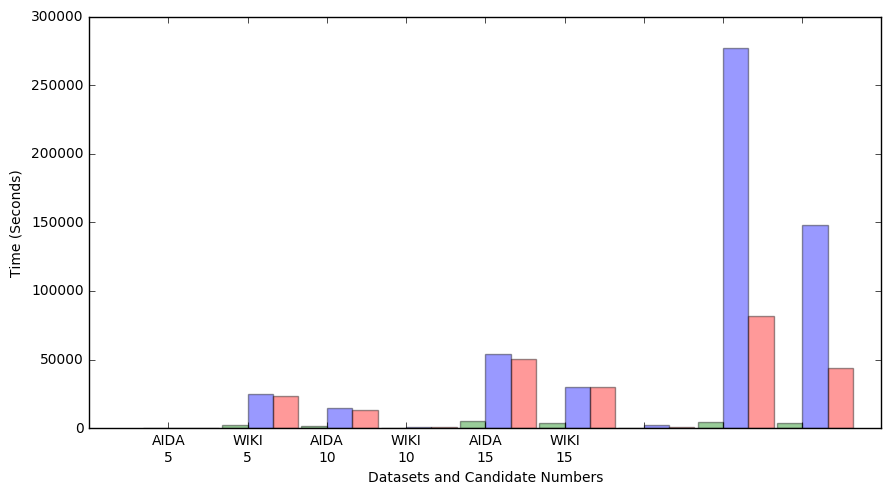

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(num=None, figsize=(9, 5), dpi=80, facecolor='w', edgecolor='k')

index = np.arange(len(x))
bar_width = 0.32

opacity = 0.4
error_config = {'ecolor': '0.3'}

# plt.plot(index, x, '-.o',  ms=10, lw=3,alpha=0.7, color='red', label='Coherence (ILP)')
# plt.plot(index, y, '-v', ms=10, lw=3,alpha=0.7, color='green', label='Key Search')
# plt.plot(index, z, ':*', ms=10, lw=3,alpha=0.7, color='blue', label='VSM Key Recog.')
rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity,
                 color='b',
                
                 error_kw=error_config)

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config)
rects2 = plt.bar(index - bar_width, z, bar_width,
                 alpha=opacity,
                 color='g')

plt.xlabel('Datasets and Candidate Numbers')
plt.ylabel('Time (Seconds)')

# l1=["DS1","DS2","DS3","DS4","DS5"]*3
# l2=['5']*2+['10']*2+['15']*5

l1=["AIDA","WIKI"]*3
l2=['5']*2+['10']*2+['15']*5


labels = [r+"\n"+s for r,s in zip(l1,l2)]
plt.xticks(np.arange(len(x)),labels)
plt.legend()

plt.tight_layout()
plt.legend(loc=2)
plt.savefig('timebar.eps')
plt.show()


# Semantic Resuls


In [1]:
import pandas as pd
df = pd.read_csv('/home/sajadi/backup/projects/reports/semanticresults/outputs/spearman/spearman2.csv', sep=',', header=0)
df.head()

,Unnamed: 0,29-edited,65-edited,353-edited,wordsim_similarity-edited,wordsim_relatedness-edited,kore-edited,minimayo.2,minimayo.1,minimayo.3,MayoSRS-edited,UMNSRS_similarity-edited,UMNSRS_relatedness-edited
0,lgd/results.txt,0.86,0.81,0.69,0.79,0.62,0.62,0.62,0.68,0.66,0.46,0.58,0.50
1,coup/results.txt,0.90,0.75,0.67,0.77,0.54,0.61,0.61,0.66,0.64,0.43,0.49,0.40
2,ams/results.txt,0.86,0.80,0.69,0.79,0.61,0.63,0.58,0.66,0.64,0.44,0.54,0.44
3,ams2/results.txt,0.88,0.81,0.69,0.79,0.59,0.65,0.65,0.72,0.69,0.48,0.55,0.46
4,adamin/results.txt,0.80,0.78,0.65,0.72,0.62,0.50,0.69,0.72,0.71,0.48,0.58,0.53


In [ ]:
tb_no=1

In [2]:
df1= df.drop('wordsim_similarity-edited', axis=1)
df1= df1.drop('wordsim_relatedness-edited', axis=1)
df1= df1.drop('minimayo.1', axis=1)
#df1= df1.drop('minimayo.3', axis=1)
#df1 = df1.columns.rename({'Unnamed: 0':'method'})
df1=df1.rename(columns={'Unnamed: 0':'method'})

In [3]:
def methodselect(r):
    if tb_no==1:
        return r.loc['method'] in \
            [
             'ams/results.txt','all/nged/results.txt', 'all/hits/pagerank/results.cos.txt',  'all/hits/rvspagerank/results.cos.txt',
             'hitsboth.avg.rvspagerank.rvspagerank/results.cos.txt',
            ]
    if tb_no==2:
        return r.loc['method'] in \
            ['in/no/results.txt','in/nged/results.txt', 'in/hits/pagerank/results.cos.txt',  'in/hits/rvspagerank/results.cos.txt',
             'out/no/results.txt','out/nged/results.txt', 'out/hits/pagerank/results.cos.txt',  'out/hits/rvspagerank/results.cos.txt',
             'all/no/results.txt','all/nged/results.txt', 'all/hits/pagerank/results.cos.txt',  'all/hits/rvspagerank/results.cos.txt',
             'hitsboth.avg.rvspagerank.rvspagerank/results.cos.txt',
            ]
    
df2 = df1[df1.apply(methodselect, axis=1)]
df2

,method,29-edited,65-edited,353-edited,kore-edited,minimayo.2,minimayo.3,MayoSRS-edited,UMNSRS_similarity-edited,UMNSRS_relatedness-edited
8,in/no/results.txt,0.86,0.82,0.66,0.64,0.62,0.66,0.47,0.58,0.50
11,in/nged/results.txt,0.85,0.80,0.66,0.61,0.72,0.73,0.49,0.59,0.53
12,out/no/results.txt,0.90,0.75,0.67,0.63,0.61,0.64,0.44,0.50,0.41
15,out/nged/results.txt,0.90,0.73,0.67,0.62,0.64,0.66,0.48,0.51,0.44
16,all/no/results.txt,0.86,0.80,0.66,0.64,0.59,0.64,0.45,0.54,0.44
19,all/nged/results.txt,0.86,0.79,0.66,0.60,0.67,0.70,0.48,0.56,0.50
39,in/hits/pagerank/results.cos.txt,0.86,0.83,0.69,0.68,0.67,0.69,0.52,0.59,0.53
41,out/hits/pagerank/results.cos.txt,0.74,0.54,0.51,0.28,-0.08,-0.11,0.02,0.14,0.06
43,all/hits/pagerank/results.cos.txt,0.74,0.60,0.53,0.38,-0.11,-0.13,0.02,0.13,0.05
51,in/hits/rvspagerank/results.cos.txt,0.84,0.80,0.65,0.64,0.67,0.68,0.58,0.59,0.53


In [4]:
idx = df2.loc[:,'method']
idx=idx.apply(lambda x: x[0:3])
df3=df2.copy()
df3.insert(0,'dir',idx)
df3

,dir,method,29-edited,65-edited,353-edited,kore-edited,minimayo.2,minimayo.3,MayoSRS-edited,UMNSRS_similarity-edited,UMNSRS_relatedness-edited
8,in/,in/no/results.txt,0.86,0.82,0.66,0.64,0.62,0.66,0.47,0.58,0.50
11,in/,in/nged/results.txt,0.85,0.80,0.66,0.61,0.72,0.73,0.49,0.59,0.53
12,out,out/no/results.txt,0.90,0.75,0.67,0.63,0.61,0.64,0.44,0.50,0.41
15,out,out/nged/results.txt,0.90,0.73,0.67,0.62,0.64,0.66,0.48,0.51,0.44
16,all,all/no/results.txt,0.86,0.80,0.66,0.64,0.59,0.64,0.45,0.54,0.44
19,all,all/nged/results.txt,0.86,0.79,0.66,0.60,0.67,0.70,0.48,0.56,0.50
39,in/,in/hits/pagerank/results.cos.txt,0.86,0.83,0.69,0.68,0.67,0.69,0.52,0.59,0.53
41,out,out/hits/pagerank/results.cos.txt,0.74,0.54,0.51,0.28,-0.08,-0.11,0.02,0.14,0.06
43,all,all/hits/pagerank/results.cos.txt,0.74,0.60,0.53,0.38,-0.11,-0.13,0.02,0.13,0.05
51,in/,in/hits/rvspagerank/results.cos.txt,0.84,0.80,0.65,0.64,0.67,0.68,0.58,0.59,0.53


In [5]:
df4 = df3.copy().sort_values(by=['dir','method'])
df4.index = pd.MultiIndex.from_arrays([df4['dir'], df4['method']],names=['dir', 'Method'])
df4=df4.drop('dir', axis=1)
df4=df4.drop('method', axis=1)

df4

29-edited  65-edited  \
dir Method                                                                     
all all/hits/pagerank/results.cos.txt                        0.74       0.60   
    all/hits/rvspagerank/results.cos.txt                     0.85       0.80   
    all/nged/results.txt                                     0.86       0.79   
    all/no/results.txt                                       0.86       0.80   
hit hitsboth.avg.rvspagerank.rvspagerank/results.co...       0.90       0.82   
in/ in/hits/pagerank/results.cos.txt                         0.86       0.83   
    in/hits/rvspagerank/results.cos.txt                      0.84       0.80   
    in/nged/results.txt                                      0.85       0.80   
    in/no/results.txt                                        0.86       0.82   
out out/hits/pagerank/results.cos.txt                        0.74       0.54   
    out/hits/rvspagerank/results.cos.txt                     0.88       0.80   
    out/nged/results.txt                                     0.90       0.73   
    out/no/results.txt                                       0.90       0.75   

                                                        353-edited  \
dir Method                                                           
all all/hits/pagerank/results.cos.txt                         0.53   
    all/hits/rvspagerank/results.cos.txt                      0.67   
    all/nged/results.txt                                      0.66   
    all/no/results.txt                                        0.66   
hit hitsboth.avg.rvspagerank.rvspagerank/results.co...        0.72   
in/ in/hits/pagerank/results.cos.txt                          0.69   
    in/hits/rvspagerank/results.cos.txt                       0.65   
    in/nged/results.txt                                       0.66   
    in/no/results.txt                                         0.66   
out out/hits/pagerank/results.cos.txt                         0.51   
    out/hits/rvspagerank/results.cos.txt                      0.71   
    out/nged/results.txt                                      0.67   
    out/no/results.txt                                        0.67   

                                                        kore-edited  \
dir Method                                                            
all all/hits/pagerank/results.cos.txt                          0.38   
    all/hits/rvspagerank/results.cos.txt                       0.65   
    all/nged/results.txt                                       0.60   
    all/no/results.txt                                         0.64   
hit hitsboth.avg.rvspagerank.rvspagerank/results.co...         0.72   
in/ in/hits/pagerank/results.cos.txt                           0.68   
    in/hits/rvspagerank/results.cos.txt                        0.64   
    in/nged/results.txt                                        0.61   
    in/no/results.txt                                          0.64   
out out/hits/pagerank/results.cos.txt                          0.28   
    out/hits/rvspagerank/results.cos.txt                       0.71   
    out/nged/results.txt                                       0.62   
    out/no/results.txt                                         0.63   

                                                        minimayo.2  \
dir Method                                                           
all all/hits/pagerank/results.cos.txt                        -0.11   
    all/hits/rvspagerank/results.cos.txt                      0.67   
    all/nged/results.txt                                      0.67   
    all/no/results.txt                                        0.59   
hit hitsboth.avg.rvspagerank.rvspagerank/results.co...        0.69   
in/ in/hits/pagerank/results.cos.txt                          0.67   
    in/hits/rvspagerank/results.cos.txt                       0.67   
    in/nged/results.txt                                       0.72   
    in/no/results.txt                 

In [ ]:
x=pd.DataFrame([['c','d',1],['a','b',2],['a','h',3],['c','f',4]], index=['m','n','p','q'], columns=['R','S','T'] )
x

In [ ]:
x.sort_values(by=['R','S'])

In [ ]:
x['R']=pd.Categorical(x['R'],['c','a'])

In [ ]:
x.sort_values(by=['R','S'])